In [1]:
!wget -O positivos_covid.csv https://cloud.minsa.gob.pe/s/Y8w3wHsEdYQSZRp/download


--2022-04-30 02:07:59--  https://cloud.minsa.gob.pe/s/Y8w3wHsEdYQSZRp/download
Resolving cloud.minsa.gob.pe (cloud.minsa.gob.pe)... 104.18.20.224, 104.18.21.224, 2606:4700::6812:14e0, ...
Connecting to cloud.minsa.gob.pe (cloud.minsa.gob.pe)|104.18.20.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193751441 (185M) [text/csv]
Saving to: ‘positivos_covid.csv’

positivos_covid.csv 100%[===================>] 184.78M  8.26MB/s    in 23s     

2022-04-30 02:08:24 (8.07 MB/s) - ‘positivos_covid.csv’ saved [193751441/193751441]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns



In [3]:
df=pd.read_csv("positivos_covid.csv",sep=";",parse_dates=["FECHA_CORTE","FECHA_RESULTADO"])



In [4]:
df

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,2021-07-03,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,2020-03-29
1,2021-07-03,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,2020-03-30
2,2021-07-03,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,2020-03-30
3,2021-07-03,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,2020-03-30
4,2021-07-03,027561e9d126e7c283d79c02cede562d,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,2020-03-30
...,...,...,...,...,...,...,...,...,...
2065108,2021-07-03,0295e3f769c42a483a4567aa384dd18c,LIMA,LIMA,LIMA,PCR,67.0,MASCULINO,2021-05-29
2065109,2021-07-03,a7d0f2742d66fa2653d2542ec53b5adc,AREQUIPA,AREQUIPA,CAYMA,PCR,48.0,MASCULINO,2021-05-29
2065110,2021-07-03,efaf0e5497b15883203fb4214c0ccf1b,LAMBAYEQUE,CHICLAYO,CHICLAYO,PCR,58.0,MASCULINO,2021-05-29
2065111,2021-07-03,dac870c3531fdeaf891db7c8c88527f8,LA LIBERTAD,TRUJILLO,TRUJILLO,PCR,46.0,MASCULINO,2021-05-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065113 entries, 0 to 2065112
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FECHA_CORTE      datetime64[ns]
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             float64       
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 141.8+ MB


In [6]:
df.groupby("SEXO").count()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,FECHA_RESULTADO
SEXO,,,,,,,,
FEMENINO,1006052,1006052,1006052,1006052,1006052,1006052,1005937,1005081
MASCULINO,1059060,1059060,1059060,1059060,1059060,1059060,1058831,1058008


In [7]:
df[["FECHA_RESULTADO","SEXO","UUID"]].groupby(["FECHA_RESULTADO","SEXO"]).count()

UUID
FECHA_RESULTADO SEXO           
2020-03-06      MASCULINO     1
2020-03-07      FEMENINO      1
                MASCULINO     4
2020-03-08      FEMENINO      1
                MASCULINO     1
...                         ...
2021-07-01      MASCULINO  1107
2021-07-02      FEMENINO    999
                MASCULINO   971
2021-07-03      FEMENINO    493
                MASCULINO   472

[964 rows x 1 columns]

In [8]:
df.groupby("SEXO").size()
#df.groupby("SEXO").size().plot.hist()

SEXO
FEMENINO     1006052
MASCULINO    1059060
dtype: int64

In [9]:
df.groupby("DEPARTAMENTO")[["PROVINCIA"]].count()

,PROVINCIA
DEPARTAMENTO,
AMAZONAS,30079
ANCASH,73266
APURIMAC,24858
AREQUIPA,102772
AYACUCHO,30800
CAJAMARCA,62448
CALLAO,97416
CUSCO,68101
HUANCAVELICA,15321


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065113 entries, 0 to 2065112
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FECHA_CORTE      datetime64[ns]
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             float64       
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 141.8+ MB


In [11]:
df[['FECHA_RESULTADO',"DEPARTAMENTO","PROVINCIA"]].groupby('FECHA_RESULTADO').count()

,DEPARTAMENTO,PROVINCIA
FECHA_RESULTADO,,
2020-03-06,1,1
2020-03-07,5,5
2020-03-08,2,2
2020-03-09,3,3
2020-03-10,1,1
...,...,...
2021-06-29,923,923
2021-06-30,2435,2435
2021-07-01,2215,2215


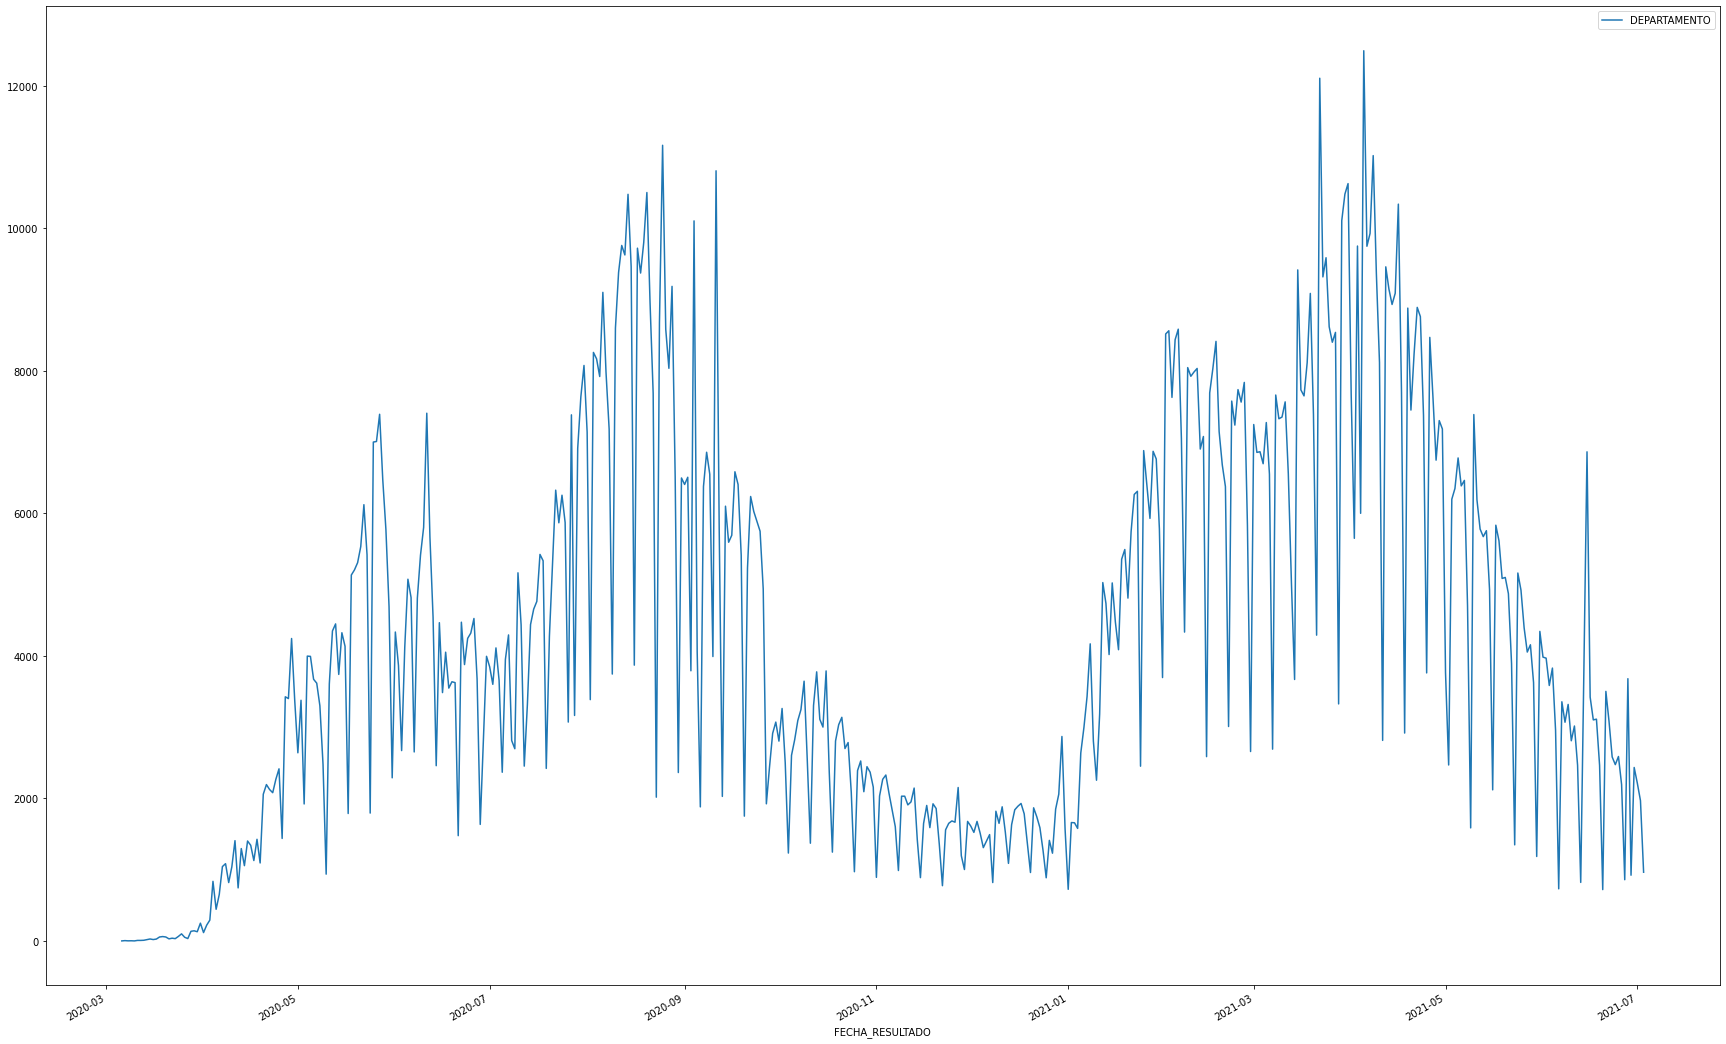

In [12]:
df[['FECHA_RESULTADO', 'DEPARTAMENTO']].groupby('FECHA_RESULTADO').count().plot(figsize=(30, 20))
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065113 entries, 0 to 2065112
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   FECHA_CORTE      datetime64[ns]
 1   UUID             object        
 2   DEPARTAMENTO     object        
 3   PROVINCIA        object        
 4   DISTRITO         object        
 5   METODODX         object        
 6   EDAD             float64       
 7   SEXO             object        
 8   FECHA_RESULTADO  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 141.8+ MB


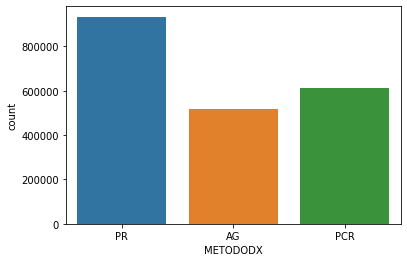

In [14]:
sns.countplot(data=df,x="METODODX")

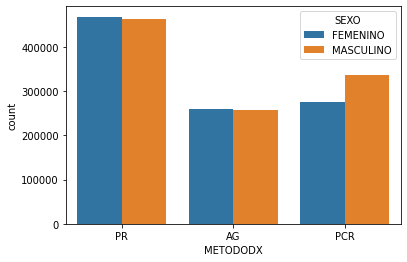

In [15]:

sns.countplot(data=df,x="METODODX", hue="SEXO")


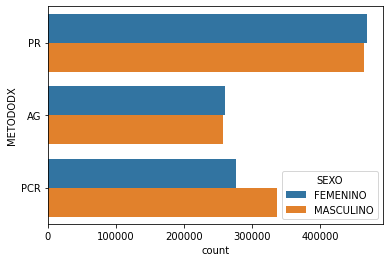

In [16]:
sns.countplot(data = df, y= "METODODX",hue="SEXO")

### Pregunta 1

¿Cuántas pruebas fueron ejecutadas?

In [17]:
df.shape[0]

2065113

### Pregunta 3

Contar la cantidad de nulos por columna

In [18]:
df.isnull()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2065108,False,False,False,False,False,False,False,False,False
2065109,False,False,False,False,False,False,False,False,False
2065110,False,False,False,False,False,False,False,False,False
2065111,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                344
SEXO                  1
FECHA_RESULTADO    2023
dtype: int64

### Pregunta 4

¿Cuál es la cantidad de casos positivos por cada **tipo de prueba**?


In [20]:
df.groupby('METODODX').size()

METODODX
AG     518078
PCR    613392
PR     933643
dtype: int64

### Pregunta 5

¿Cuál es la cantidad de casos positivos por **departamento** y **tipo de prueba**?

In [21]:
df[["DEPARTAMENTO","METODODX","SEXO"]].groupby(["DEPARTAMENTO","METODODX"]).count()

SEXO
DEPARTAMENTO METODODX       
AMAZONAS     AG         6884
             PCR        4760
             PR        18435
ANCASH       AG        29337
             PCR       15442
...                      ...
TUMBES       PCR        4313
             PR         8915
UCAYALI      AG         7276
             PCR        2556
             PR        21888

[78 rows x 1 columns]

### Pregunta 6

¿Cuál fue la persona de mayor edad que dió positivo a **COVID-19**?

In [22]:
df["EDAD"].max()

121.0

In [23]:
df[df["EDAD"]==df["EDAD"].max()]

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
1588183,2021-07-03,b6bca580efd52857e83de79488f9a8e3,LIMA,LIMA,LIMA,PCR,121.0,FEMENINO,2021-03-12
1871869,2021-07-03,b618234e69c43d3ecb9ba769a7dc6872,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO,2021-01-19
1873201,2021-07-03,e2409cdf73bae59fb66ac8d99432bd7f,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO,2021-03-03
1876749,2021-07-03,5c2e2fa52711c03c738749a9581df07a,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO,2021-01-05


In [24]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FECHA_CORTE                     2021-07-03 00:00:00
UUID               fffffba96ce0f962bea63ccc4ebad0b0
DEPARTAMENTO                                UCAYALI
PROVINCIA                                 ZARUMILLA
DISTRITO                               ÑAHUIMPUQUIO
METODODX                                         PR
EDAD                                          121.0
FECHA_RESULTADO                 2021-07-03 00:00:00
dtype: object

### Pregunta 7

Ordene los distritos de Lima por cantidad de casos

In [25]:
df[["DISTRITO","EDAD"]][df["DEPARTAMENTO"]=="LIMA"].groupby("DISTRITO").count().sort_values("EDAD",ascending=False)

,EDAD
DISTRITO,
SAN JUAN DE LURIGANCHO,71818
LIMA,70927
EN INVESTIGACIÓN,69000
SAN MARTIN DE PORRES,50630
JESUS MARIA,45694
COMAS,41800
ATE,38731
VILLA MARIA DEL TRIUNFO,30915
VILLA EL SALVADOR,30780


### Pregunta 9

¿Cuál es el caso más reciente?

In [26]:
df["FECHA_RESULTADO"].max()

Timestamp('2021-07-03 00:00:00')

In [27]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FECHA_CORTE                     2021-07-03 00:00:00
UUID               fffffba96ce0f962bea63ccc4ebad0b0
DEPARTAMENTO                                UCAYALI
PROVINCIA                                 ZARUMILLA
DISTRITO                               ÑAHUIMPUQUIO
METODODX                                         PR
EDAD                                          121.0
FECHA_RESULTADO                 2021-07-03 00:00:00
dtype: object

### Pregunta 10

Muestre un histograma de casos por tiempo ¿qué concluye sobre los picos y depresiones en la serie temporal? Muestre también el gráfico de casos acumulados.

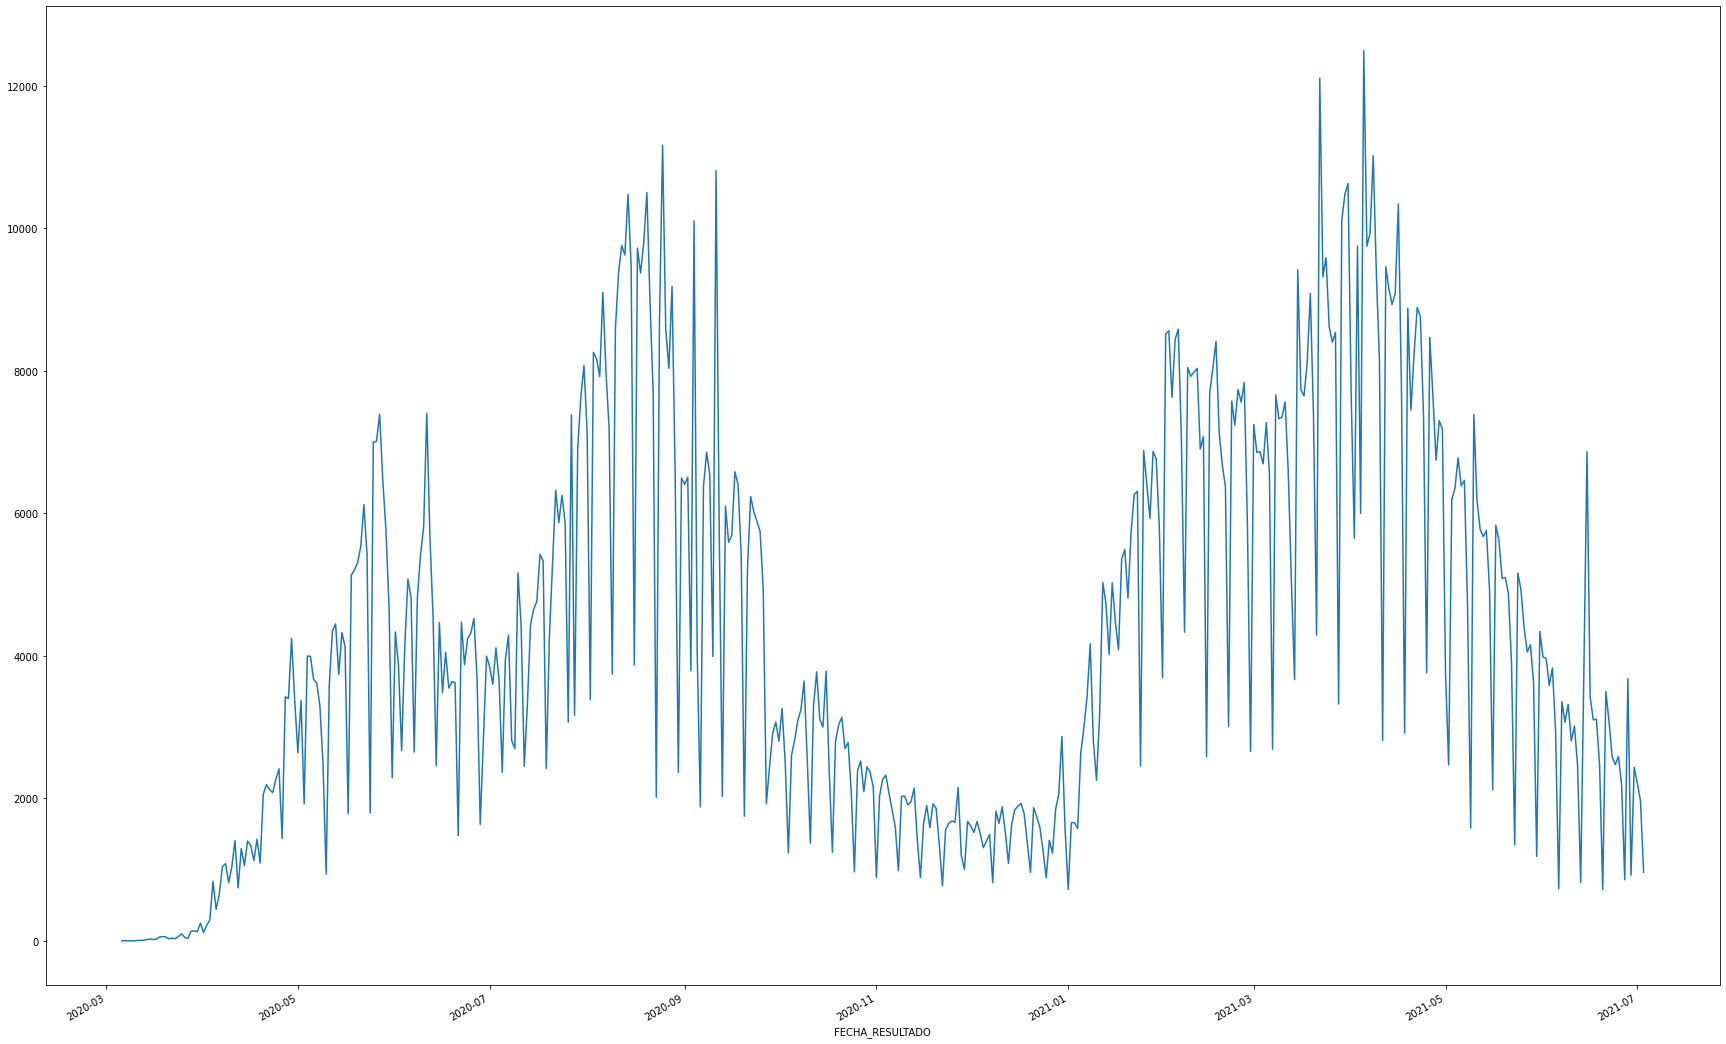

In [49]:
df.groupby("FECHA_RESULTADO").size().plot(figsize=(30,20))

In [29]:
df.groupby("FECHA_RESULTADO").size()

FECHA_RESULTADO
2020-03-06       1
2020-03-07       5
2020-03-08       2
2020-03-09       3
2020-03-10       1
              ... 
2021-06-29     923
2021-06-30    2435
2021-07-01    2215
2021-07-02    1970
2021-07-03     965
Length: 483, dtype: int64

In [30]:
df.groupby("FECHA_RESULTADO").size().cumsum()

FECHA_RESULTADO
2020-03-06          1
2020-03-07          6
2020-03-08          8
2020-03-09         11
2020-03-10         12
               ...   
2021-06-29    2055505
2021-06-30    2057940
2021-07-01    2060155
2021-07-02    2062125
2021-07-03    2063090
Length: 483, dtype: int64

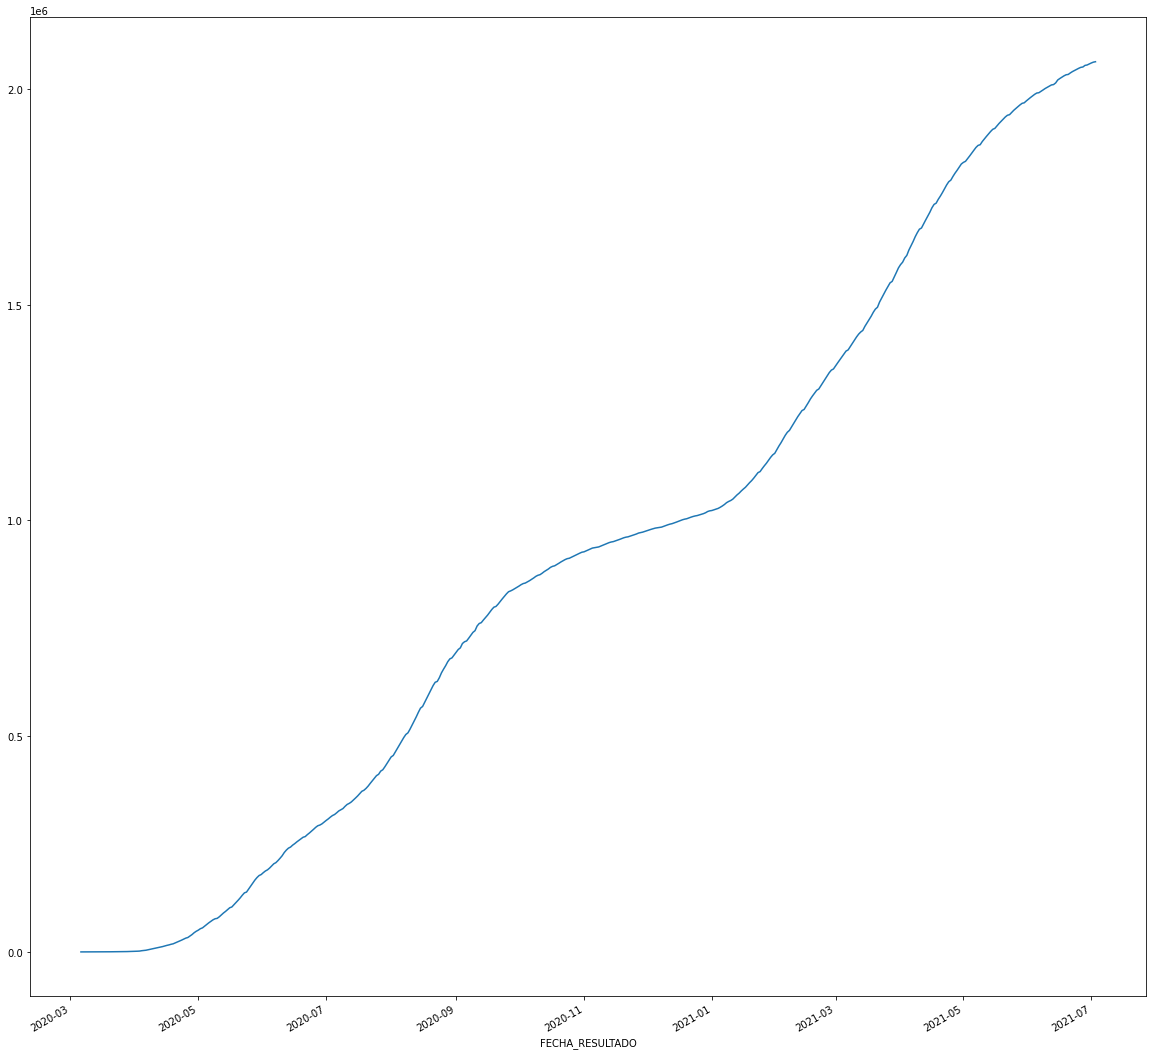

In [31]:
df.groupby("FECHA_RESULTADO").size().cumsum().plot(figsize=(20,20))

### Pregunta 11

Muestre la serie temporal procesada realizando un moving average


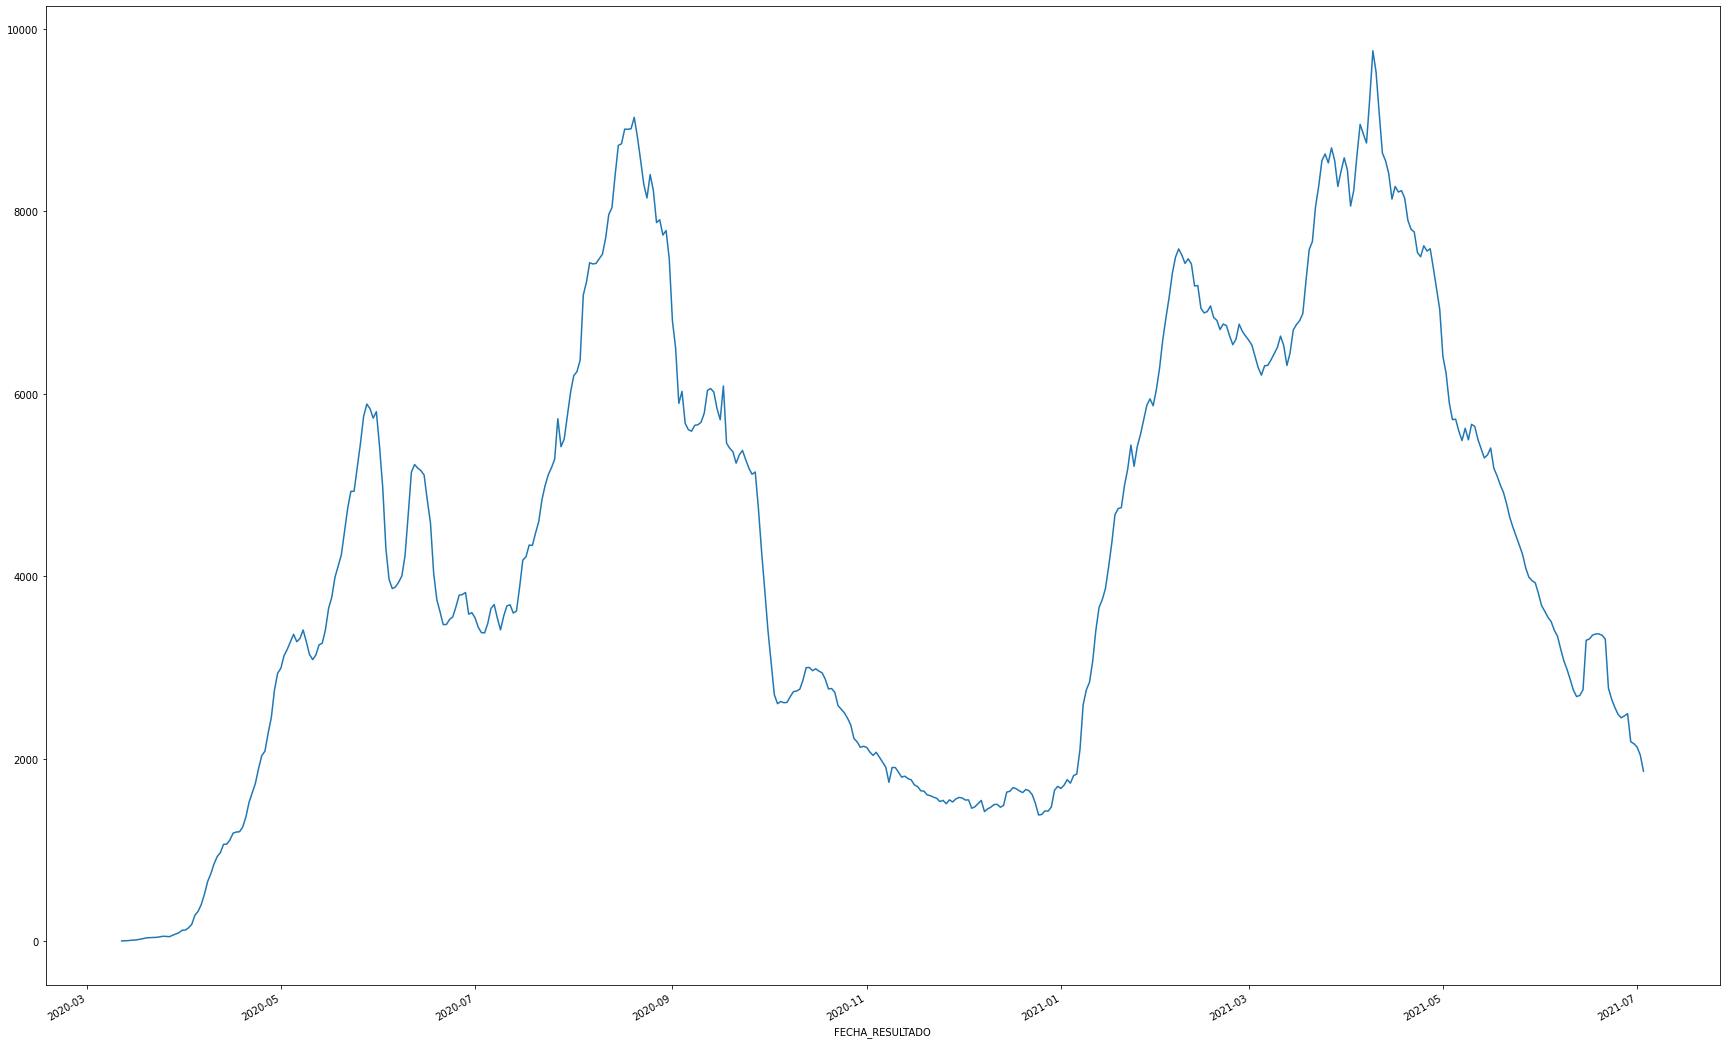

In [50]:


df.groupby("FECHA_RESULTADO").size().rolling(7).mean().plot(figsize=(30,20))

### Pregunta 12

Realice esto mismo y muestre 3 distritos en una Departamento/Provincia, por ejemplo en Lima podría ser `['SAN MIGUEL', 'MAGDALENA DEL MAR', 'PUENTE PIEDRA']`


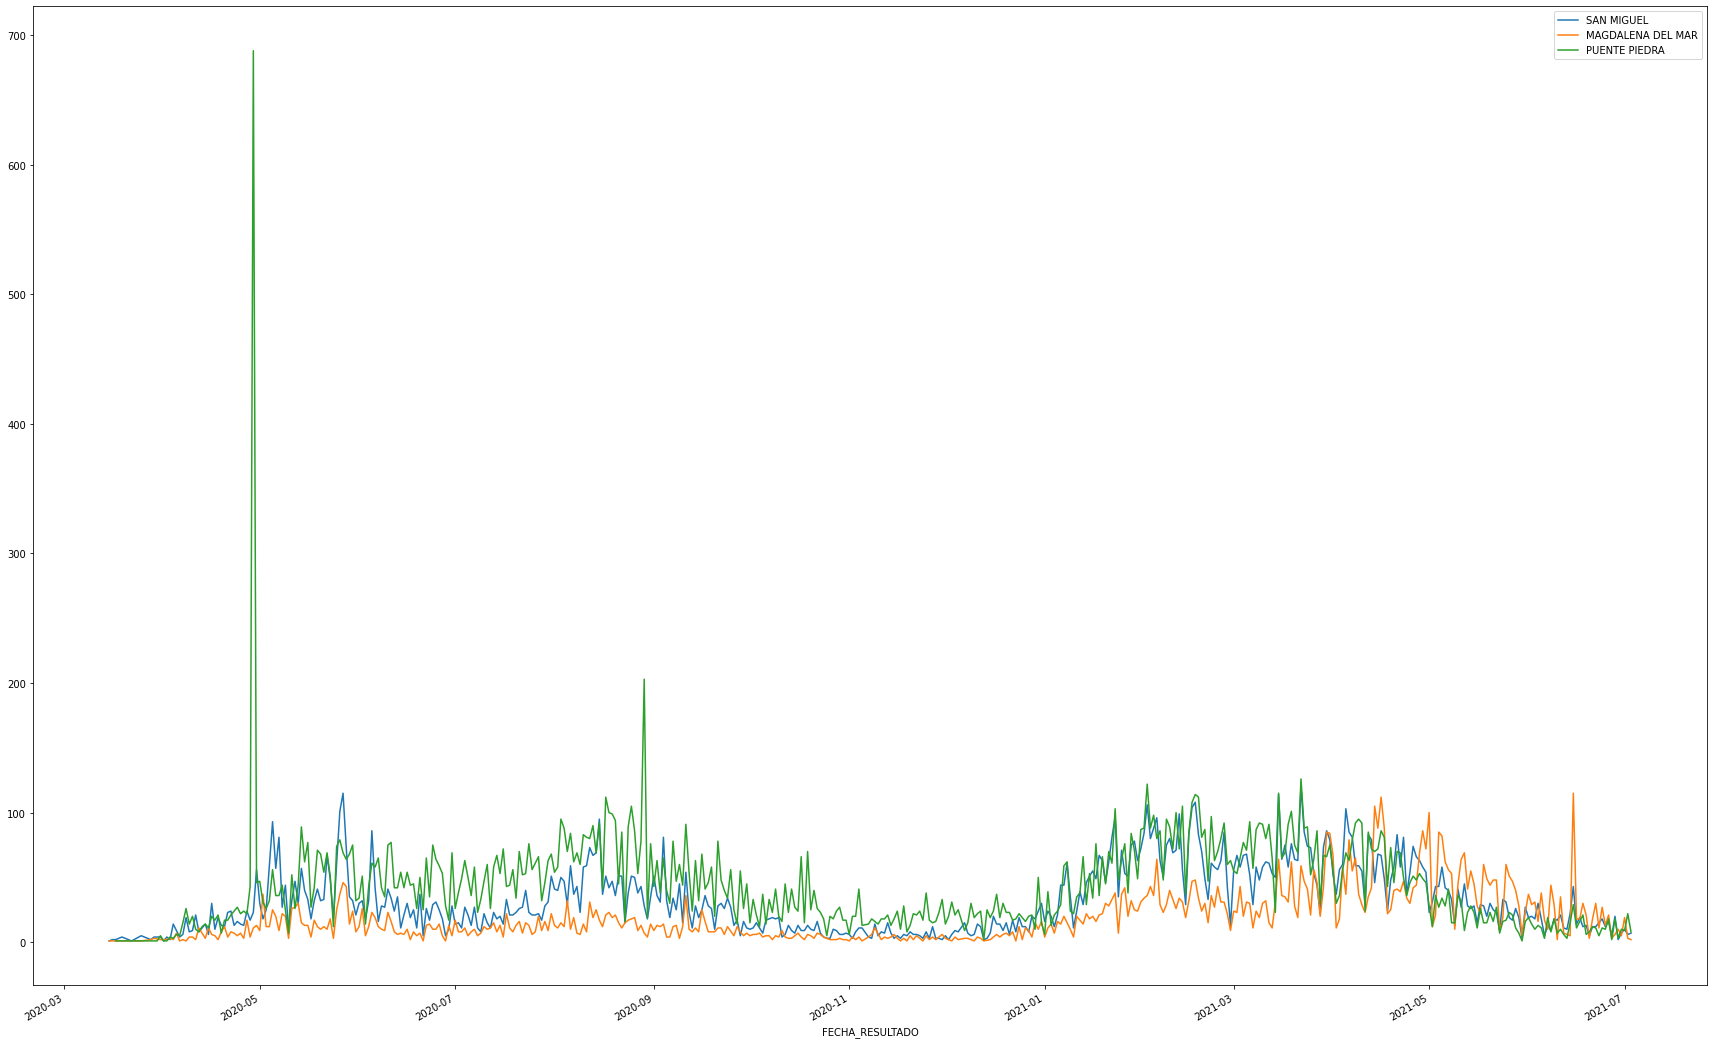

In [62]:
# sin serie del tiempo


df[df["DISTRITO"]=="SAN MIGUEL"].groupby("FECHA_RESULTADO").size().plot(figsize=(30,20))
df[df["DISTRITO"]=="MAGDALENA DEL MAR"].groupby("FECHA_RESULTADO").size().plot(figsize=(30,20))
df[df["DISTRITO"]=="PUENTE PIEDRA"].groupby("FECHA_RESULTADO").size().plot(figsize=(30,20))

plt.legend(["SAN MIGUEL","MAGDALENA DEL MAR","PUENTE PIEDRA"])

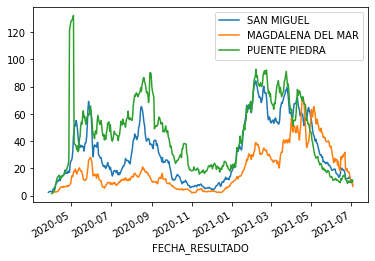

In [60]:
# con serie del tiempo


df[df["DISTRITO"]=="SAN MIGUEL"].groupby("FECHA_RESULTADO").size().rolling(7).mean().plot()
df[df["DISTRITO"]=="MAGDALENA DEL MAR"].groupby("FECHA_RESULTADO").size().rolling(7).mean().plot()
df[df["DISTRITO"]=="PUENTE PIEDRA"].groupby("FECHA_RESULTADO").size().rolling(7).mean().plot()

plt.legend(["SAN MIGUEL","MAGDALENA DEL MAR","PUENTE PIEDRA"])
